# A dataset about cans of beer.

Data from http://craftcans.com/

## Do your importing and your setup

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [3]:
df = pd.read_csv("craftcans.csv")
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [4]:
df.shape

(2416, 7)

In [5]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out breweries

Where does beer come from????

## What are the top 10 producers of cans of beer?

In [6]:
df['Brewery'].value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

## What is the most common size of beer?

The answer won't be pretty - we'll learn to clean it up in a week or two.

In [7]:
df['Size'].value_counts()

12 oz.               1507
16 oz.                814
24 oz.                 21
16 oz. Alumi-Tek®      15
19.2 oz.               14
12 oz                  14
16 oz                  12
32 oz.                  5
12 ounce                1
12 OZ.                  1
8.4 oz.                 1
16.9 oz.                1
12 oz. Slimline         1
24 oz. "Silo Can"       1
12 & 16 oz.             1
19.2                    1
Name: Size, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [8]:
df['ABV'].value_counts().head(1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take three steps:

1. List just the ABV of every row
2. Remove the % symbol
3. Convert it to a `float`
4. Save it into a new column. Or the same column, if you're feeling wild.

Although it *also* turns out that there's some bad data in there. We'll need to clean that up, too.

In [9]:
df = pd.read_csv("craftcans.csv", na_values=['???'])
df['ABV'] = df['ABV'].str.replace("%","").astype(float)
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0


In [10]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [11]:
df['Location'].value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [12]:
Brooklyn_beer = df[df['Location'] == 'Brooklyn, NY']
Brooklyn_beer['Beer'].sort_values(ascending=True)

1624                             3Beans
115                              4Beans
246                             Abigale
1970                             Apollo
2074       Autumnation (2011-12) (2011)
1074                 Autumnation (2013)
588                             Bengali
1270                      Bengali Tiger
2143               Bengali Tiger (2011)
1366                        Bikini Beer
2351            Brooklyn Lager (12 oz.)
2350            Brooklyn Lager (16 oz.)
1857                Brooklyn Summer Ale
2219         Brooklyn Summer Ale (2011)
1836                         Brownstone
2062                             Diesel
2027                East India Pale Ale
1373                East India Pale Ale
1057                      Global Warmer
1971                          Harbinger
969                              Hi-Res
1365    Hipster Ale (Two Roads Brewing)
1962    Hipster Ale (Westbrook Brewing)
210                              Jammer
1093               KelSo India Pale Ale


## What brewery in Brooklyn puts out the most cans of beer?

In [13]:
df_Brooklyn = df[df['Location'] == 'Brooklyn, NY']
df_Brooklyn['Brewery'].value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [14]:
df_Brooklyn['Style'].value_counts().head(5)

American IPA                      6
American Pale Ale (APA)           3
American Double / Imperial IPA    3
Baltic Porter                     2
English India Pale Ale (IPA)      2
Name: Style, dtype: int64

## List all of the breweries in New York state. Then count them.

In [15]:
df_NY = df[df['Location'].str.contains("NY", na=False)]['Brewery'].sort_values(ascending = True).unique()
df_NY

array(['Blue Point Brewing Company', 'Bomb Beer Company',
       'Brooklyn Brewery', 'Butternuts Beer and Ale', 'Chatham Brewing',
       'Dundee Brewing Company', 'Evil Twin Brewing', 'KelSo Beer Company',
       'Matt Brewing Company', 'Montauk Brewing Company',
       'Newburgh Brewing Company', 'Sixpoint Craft Ales',
       'Southampton Publick House', 'The Bronx Brewery',
       'The Manhattan Brewing Company', 'Upstate Brewing Company'], dtype=object)

In [16]:
len(df_NY)

16

# Measuring International Bitterness Units

IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## What is the average IBU measurement across all beers?

In [17]:
df['IBUs'].mean()

42.713167259786474

## Draw the distribution of IBU measurements, but with *thirty* bins instead of the default of 10

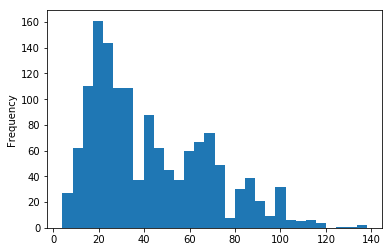

In [18]:
df['IBUs'].plot(kind='hist', bins=30)

## List all of the beers with IBUs above the 75th percentile

In [19]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [20]:
beers_above_75_pcnt = df[df['IBUs'] > 64]
beers_above_75_pcnt['Beer'].sort_values(ascending=True)

735                                 077XX
2394                              113 IPA
1088                           12th Round
568                     1916 Shore Shiver
326                2014 IPA Cicada Series
890                              2020 IPA
1816            21st Amendment IPA (2006)
524                        3:33 Black IPA
1624                               3Beans
272                       4000 Footer IPA
1394                            5 Day IPA
598                              8 Barrel
59      98 Problems (Cuz A Hop Ain't One)
493                 Abominable Winter Ale
1726         Abominable Winter Ale (2012)
2403                         Abrasive Ale
1851                              Ace IPA
737                           Almanac IPA
1300                       Alphadelic IPA
2084                Alphadelic IPA (2011)
819                American India Red Ale
2150                        Anti-Hero IPA
582                             Arcus IPA
528                               

In [21]:
# Alternative way: Using instructions from Python 03c
# You know how to calculate the 50th percentile - it's the median of ALL of the values.
# The 75th percentile should be the 50th percentile of only the top 50% of the values.

# The top 50% of the values, are all the values above the median value
# Calculating median value for all the values
IBUS_median = df['IBUs'].median()
IBUS_median

35.0

In [22]:
# Finding all the values above the median. These are the top 50% of the values
IBUS_above_median = df[df['IBUs'] > IBUS_median]

In [23]:
# Calculating the median for the values above the median. This is the 75th percentile.
pcnt_75 = IBUS_above_median['IBUs'].median()
pcnt_75

65.0

In [24]:
# The list of all beers above the 75th percentile:
beers_above_75 = df[df['IBUs'] >= pcnt_75]
beers_above_75['Beer'].sort_values(ascending=True)

735                                 077XX
2394                              113 IPA
1088                           12th Round
568                     1916 Shore Shiver
326                2014 IPA Cicada Series
890                              2020 IPA
1816            21st Amendment IPA (2006)
524                        3:33 Black IPA
1624                               3Beans
272                       4000 Footer IPA
1394                            5 Day IPA
598                              8 Barrel
59      98 Problems (Cuz A Hop Ain't One)
493                 Abominable Winter Ale
1726         Abominable Winter Ale (2012)
2403                         Abrasive Ale
1851                              Ace IPA
737                           Almanac IPA
1300                       Alphadelic IPA
2084                Alphadelic IPA (2011)
819                American India Red Ale
2150                        Anti-Hero IPA
582                             Arcus IPA
528                               

## List all of the beers with IBUs below the 25th percentile

In [25]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [26]:
beers_below_25_pcnt = df[df['IBUs'] < 21]
beers_below_25_pcnt['Beer'].sort_values(ascending = True)

2193                                             #9
854                                              #9
318                           18th Anniversary Gose
1815    21st Amendment Watermelon Wheat Beer (2006)
485                             312 Urban Wheat Ale
839                             312 Urban Wheat Ale
2011                     312 Urban Wheat Ale (2012)
1299                             541 American Lager
933                                             805
925                                A Slice of Hefen
2072                                    Abita Amber
1139                                    Agave Wheat
755                                   Alaskan Amber
658                                       Ale Cider
454                                  American Amber
453                                  American Lager
455                                  American Light
1970                                         Apollo
1756                                 Apricot Blonde
574         

In [27]:
# Similarly with the alternative way for above the 75th percentile,
#the 25th percentile should be the 50th percentile of only the bottom 50% of the values.

# The bootom 50% of the values, are all the values below the median value
IBUS_below_median = df[df['IBUs'] < IBUS_median]

In [28]:
# Calculating the median for the values below the median. This is the 25th percentile.
pcnt_25 = IBUS_below_median['IBUs'].median()
pcnt_25

20.0

In [29]:
# The list of all beers below the 25th percentile:
beer_below_25 = df[df['IBUs'] <= pcnt_25]
beer_below_25['Beer'].sort_values(ascending=True)

2193                                             #9
854                                              #9
318                           18th Anniversary Gose
1815    21st Amendment Watermelon Wheat Beer (2006)
485                             312 Urban Wheat Ale
839                             312 Urban Wheat Ale
2011                     312 Urban Wheat Ale (2012)
1299                             541 American Lager
933                                             805
925                                A Slice of Hefen
2072                                    Abita Amber
1139                                    Agave Wheat
755                                   Alaskan Amber
658                                       Ale Cider
454                                  American Amber
453                                  American Lager
455                                  American Light
1970                                         Apollo
1756                                 Apricot Blonde
574         

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the nan ones at the bottom. I want a nice graph, too - don't let them all be squished together, either!

In [30]:
median_IBUS = df.groupby('Style')['IBUs'].median().sort_values(ascending = False, na_position='last')
median_IBUS

Style
American Barleywine                    96.0
Russian Imperial Stout                 94.0
American Double / Imperial IPA         91.0
American Double / Imperial Pilsner     85.0
American Black Ale                     73.0
Belgian Strong Dark Ale                72.0
American Strong Ale                    70.0
American IPA                           69.0
English Stout                          66.0
American India Pale Lager              65.0
Belgian IPA                            61.0
English Barleywine                     60.0
Rye Beer                               57.0
Baltic Porter                          52.0
English Strong Ale                     52.0
American Double / Imperial Stout       51.0
English India Pale Ale (IPA)           47.0
American White IPA                     45.0
American Pale Ale (APA)                44.0
Extra Special / Strong Bitter (ESB)    41.0
California Common / Steam Beer         41.0
Old Ale                                40.0
American Stout            

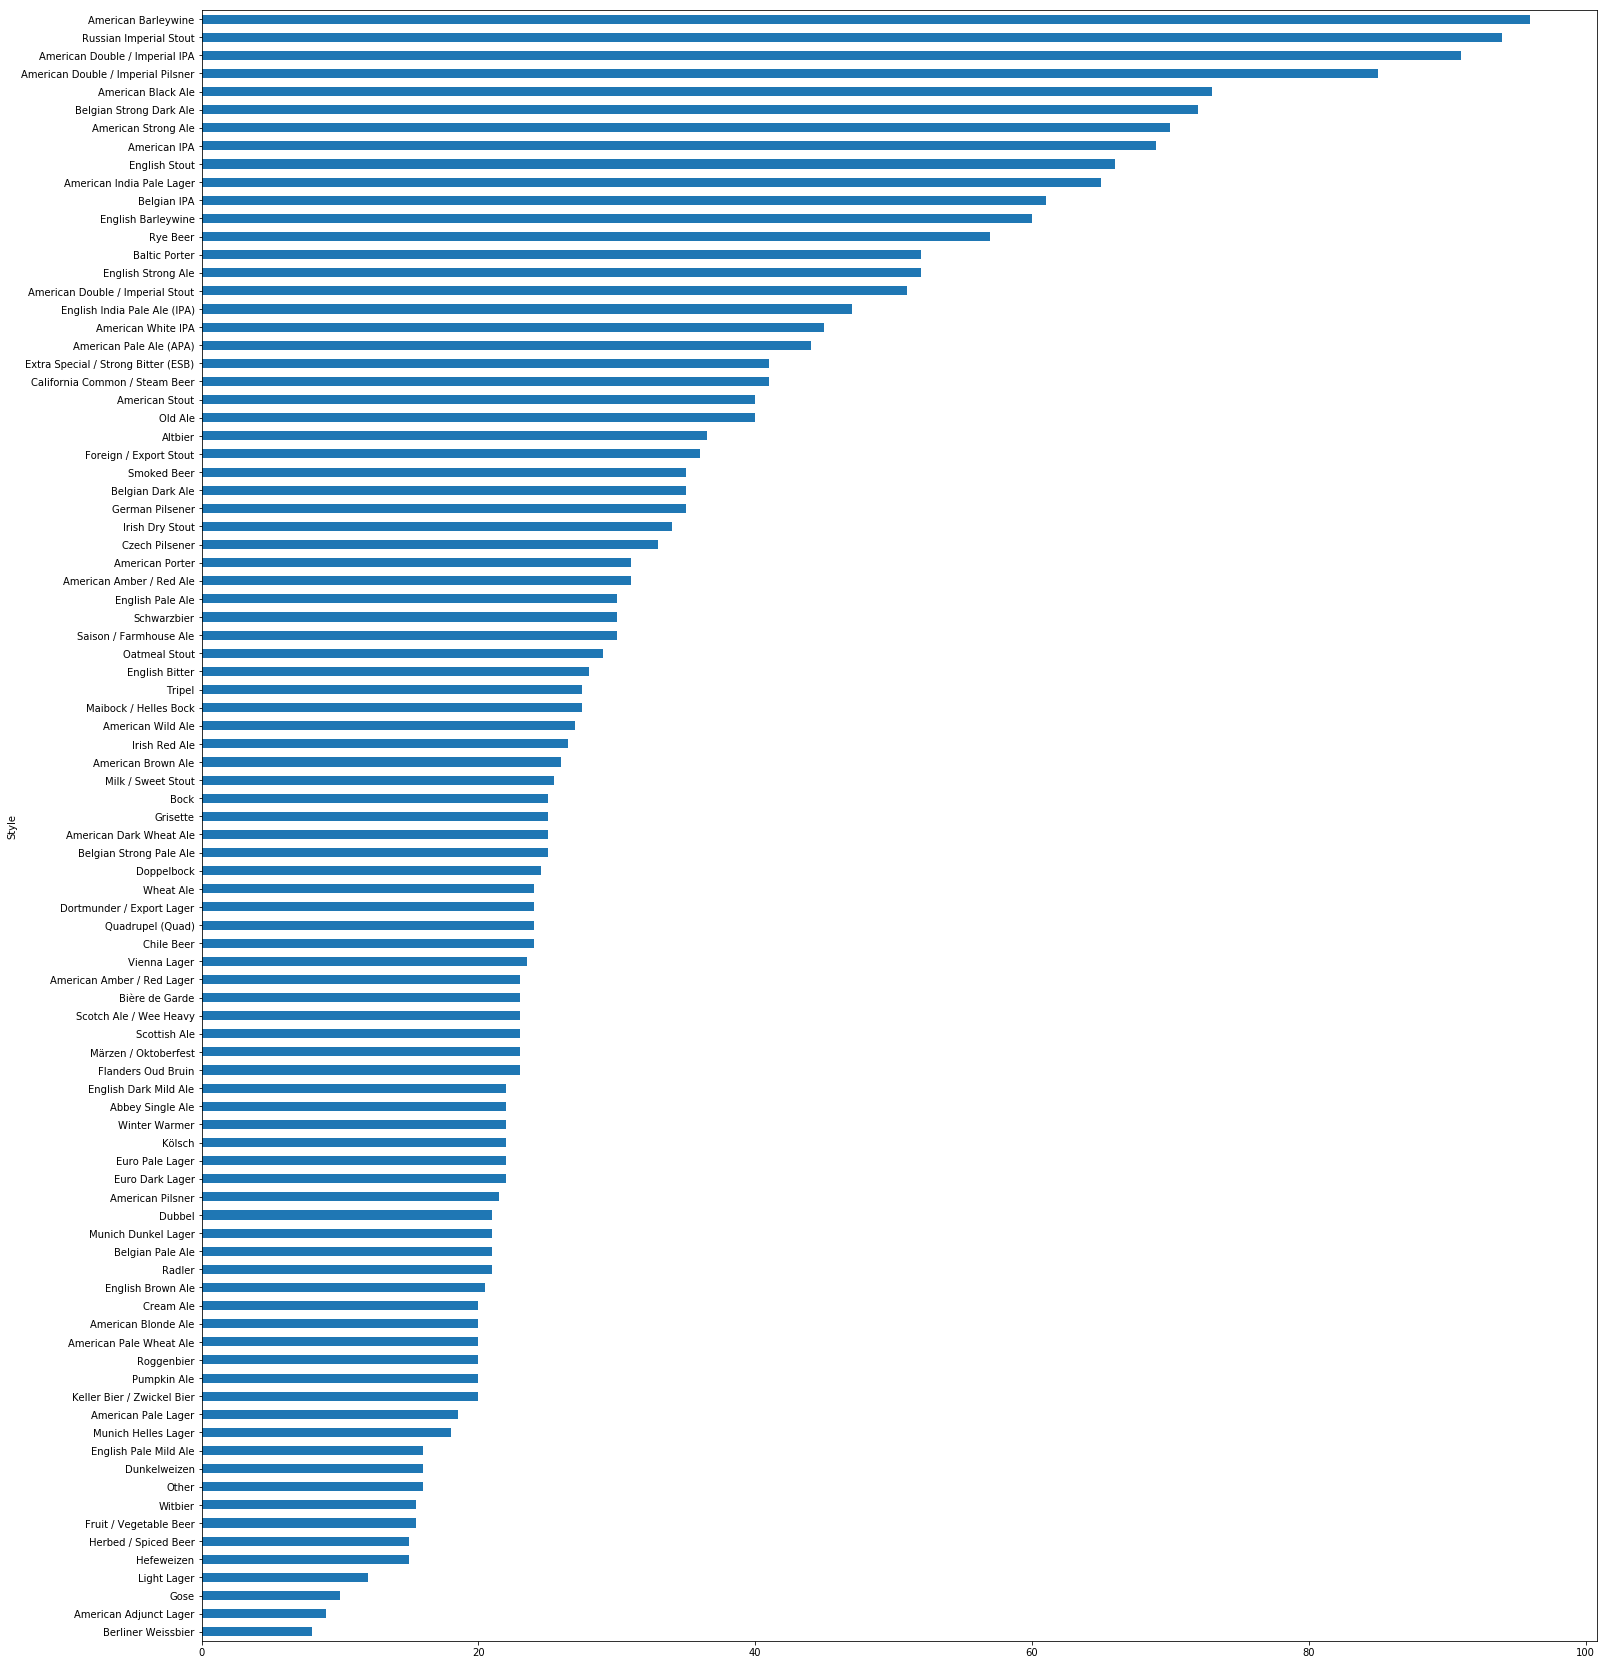

In [31]:
median_IBUS.dropna().sort_values(ascending=True).plot(kind='barh', figsize=(25,30))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

You'll want to think about it in three pieces - finding the high IBU beers, then finding out what the most common styles are, then getting the top 5.

In [32]:
high_IBUs = median_IBUS = df.groupby('Style')['IBUs'].median().sort_values(ascending = False, na_position='last').head(5)
high_IBUs

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
Name: IBUs, dtype: float64

In [33]:
low_IBUs = median_IBUS = df.groupby('Style')['IBUs'].median().sort_values(ascending = False, na_position='last')
low_IBUs.dropna().tail(5)

Style
Hefeweizen                15.0
Light Lager               12.0
Gose                      10.0
American Adjunct Lager     9.0
Berliner Weissbier         8.0
Name: IBUs, dtype: float64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles (also draw a histogram)

I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

In [34]:
beers = ['Witbier', 'Hefeweizen', 'American Pale Wheat Ale']
beers_IBUs = df[df['Style'].isin(beers)]['IBUs']
beers_IBUs.mean()

18.982142857142858

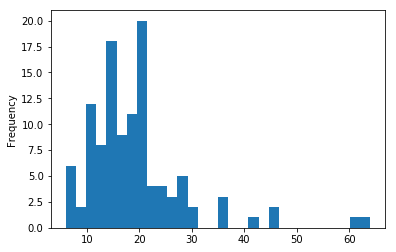

In [35]:
beers_IBUs_hist = beers_IBUs.plot(kind='hist', bins = 30)
beers_IBUs_hist

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [36]:
IPA_beers = df[df['Style'].str.contains('IPA', na=False)]
IPA_beers_avg = IPA_beers['IBUs'].mean()
IPA_beers_avg

71.948979591836732

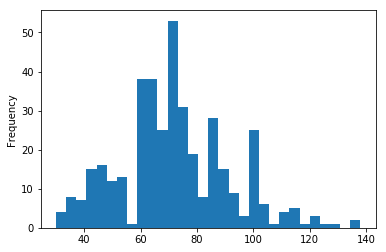

In [37]:
df[df['Style'].str.contains('IPA', na=False)]['IBUs'].plot(kind='hist', bins = 30)

## Plot those two histograms on top of one another

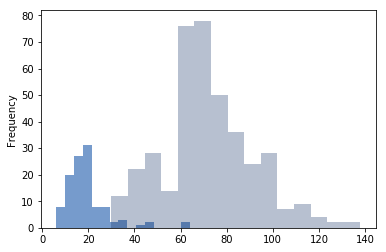

In [38]:
ax = df[df['Style'].isin(beers)]['IBUs'].plot(kind='hist', color='#769BCC', bins = 15)
df[df['Style'].str.contains('IPA', na=False)]['IBUs'].plot(kind='hist', bins = 15, color='#112F65', ax = ax, alpha=0.3)

## Compare the ABV of wheat beers vs. IPAs 

In [39]:
wheat_beers = df[df['Style'].str.contains("Wheat", na=False)]
wheat_beers['ABV'].mean()

4.8754901960784318

In [40]:
ipa_beers = df[df['Style'].str.contains("IPA", na=False)]
ipa_beers['ABV'].mean()
#ipa_beers.dtypes

6.8792857142857136